In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#     id (Unique id for each patient)
#     age (Age of the patient in years)
#     origin (place of study)
#     sex (Male/Female)
#     
#     trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
#     chol (serum cholesterol in mg/dl)
#     fbs (if fasting blood sugar > 120 mg/dl)
#     restecg (resting electrocardiographic results)
#     -- Values: [normal, stt abnormality, lv hypertrophy]
#     thalach: maximum heart rate achieved
#     exang: exercise-induced angina (True/ False)
#     oldpeak: ST depression induced by exercise relative to rest
#     slope: the slope of the peak exercise ST segment
#     ca: number of major vessels (0-3) colored by fluoroscopy
#     thal: [normal; fixed defect; reversible defect]
#     num: the predicted attribute


In [7]:
heart_data = pd.read_csv('cleve.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6.0,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3.0,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7.0,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3.0,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3.0,0


In [17]:

# Separate numeric and categorical variables for visualization purposes
CATEGORICAL_COLS = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
NUMERICAL_COLS = ['age', 'trestbps', 'chol', 'oldpeak','thalach']

heart_cat = heart_data[CATEGORICAL_COLS]
heart_num = heart_data[NUMERICAL_COLS]

heart_cat.nunique()



sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
thal       3
ca         4
dtype: int64

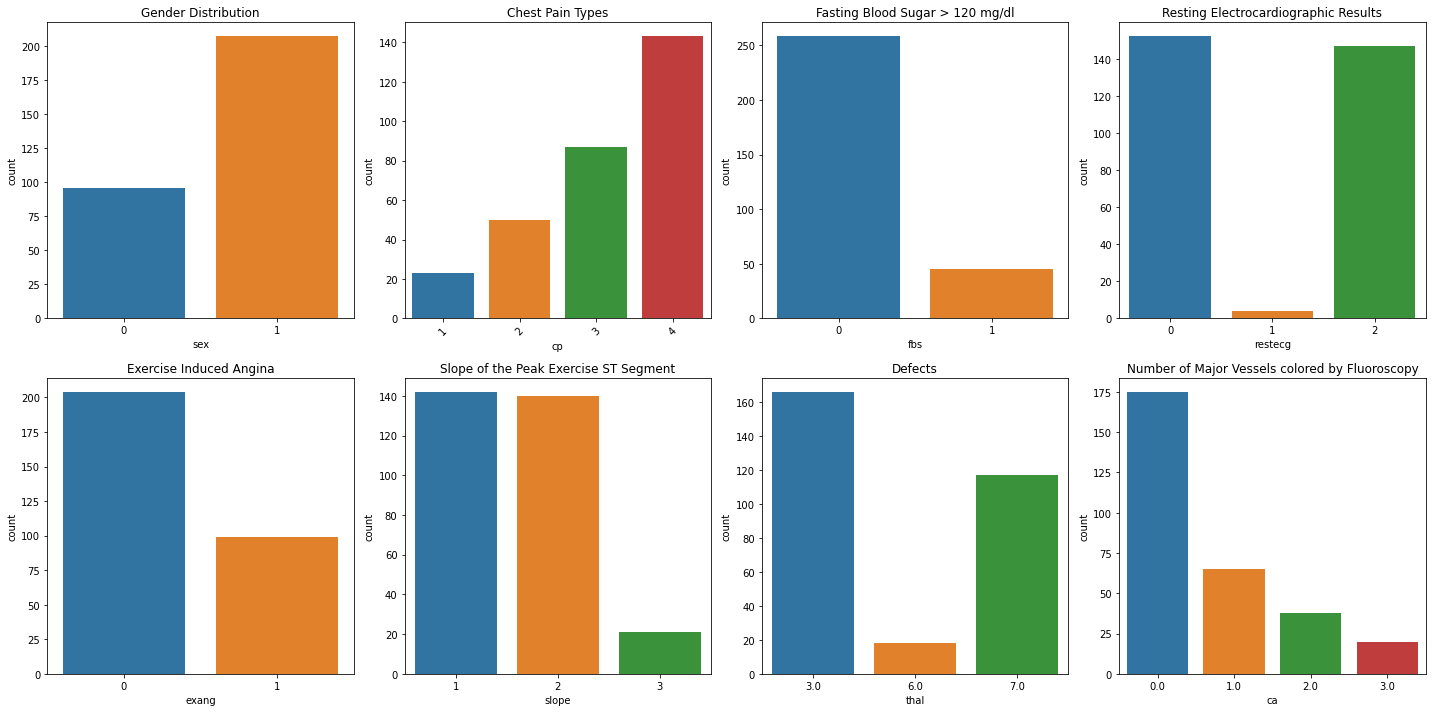

In [18]:
# Visualize the distribution of categorical variables 
fig, axes = plt.subplots(2, 4, figsize=(20,10))

sns.countplot(x='sex', data=heart_cat, ax=axes[0,0])
axes[0,0].set_title('Gender Distribution')

sns.countplot(x='cp', data=heart_cat, ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Chest Pain Types')

sns.countplot(x='fbs', data=heart_cat, ax=axes[0,2])
axes[0,2].set_title('Fasting Blood Sugar > 120 mg/dl')

sns.countplot(x='restecg', data=heart_cat, ax=axes[0,3])
axes[0,3].set_title('Resting Electrocardiographic Results')

sns.countplot(x='exang', data=heart_cat, ax=axes[1,0])
axes[1,0].set_title('Exercise Induced Angina')

sns.countplot(x='slope', data=heart_cat, ax=axes[1,1])
axes[1,1].set_title('Slope of the Peak Exercise ST Segment')

sns.countplot(x='thal', data=heart_cat, ax=axes[1,2])
axes[1,2].set_title('Defects')

sns.countplot(x='ca', data=heart_cat, ax=axes[1,3])
axes[1,3].set_title('Number of Major Vessels colored by Fluoroscopy')
plt.tight_layout()
plt.show()

#     id (Unique id for each patient)
#     age (Age of the patient in years)
#     origin (place of study)
#     sex (Male/Female)
#     cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
#     trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
#     chol (serum cholesterol in mg/dl)
#     fbs (if fasting blood sugar > 120 mg/dl)
#     restecg (resting electrocardiographic results)
#     -- Values: [normal, stt abnormality, lv hypertrophy]
#     thalach: maximum heart rate achieved
#     exang: exercise-induced angina (True/ False)
#     oldpeak: ST depression induced by exercise relative to rest
#     slope: the slope of the peak exercise ST segment
#     ca: number of major vessels (0-3) colored by fluoroscopy
#     thal: [normal; fixed defect; reversible defect]
#     num: the predicted attribute


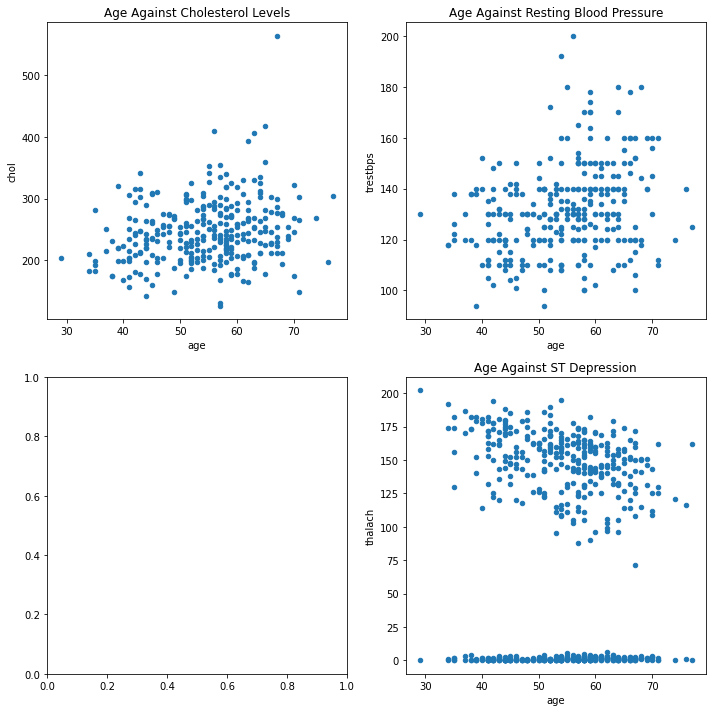

In [19]:
# Use scatterplots to visualize key relationships in numerical data
fig, axes = plt.subplots(2, 2, figsize=(10,10))

heart_num.plot('age', 'chol', kind='scatter', ax=axes[0,0])
axes[0,0].set_title('Age Against Cholesterol Levels')

heart_num.plot('age', 'trestbps', kind='scatter', ax=axes[0,1])
axes[0,1].set_title('Age Against Resting Blood Pressure')

heart_num.plot('age', 'oldpeak', kind='scatter', ax=axes[1,1])
axes[1,1].set_title('Age Against ST Depression')

heart_num.plot('age', 'thalach', kind='scatter', ax=axes[1,1])
axes[1,1].set_title('Age Against ST Depression')
plt.tight_layout()

plt.show()


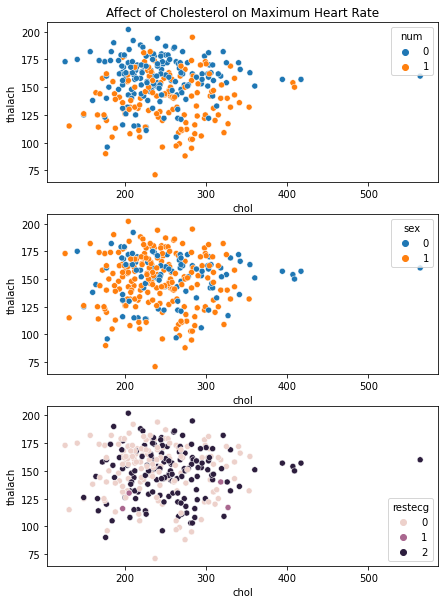

In [20]:
fig, axes = plt.subplots(3, figsize=(7,10))

sns.scatterplot(x='chol', y='thalach', hue='num', data=heart_data, ax=axes[0])
axes[0].set_title('Affect of Cholesterol on Maximum Heart Rate')

sns.scatterplot(x='chol', y='thalach', hue='sex', data=heart_data, ax=axes[1])

sns.scatterplot(x='chol', y='thalach', hue='restecg', data=heart_data, ax=axes[2])
plt.show()

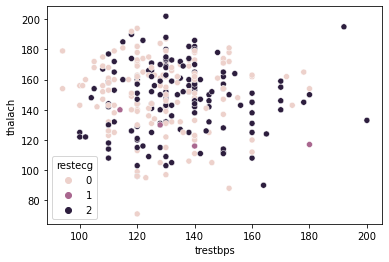

In [22]:
sns.scatterplot(x='trestbps', y='thalach', hue='restecg', data=heart_data)
plt.show()

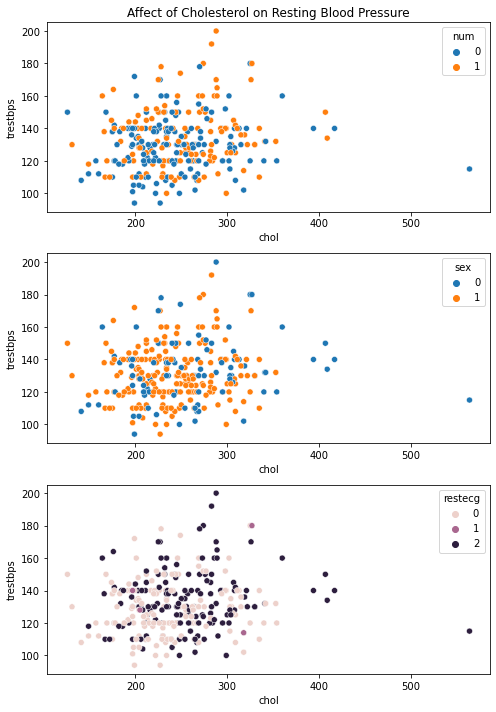

In [23]:
fig, axes = plt.subplots(3, figsize=(7,10))

axes[0].set_title('Affect of Cholesterol on Resting Blood Pressure')
sns.scatterplot(x='chol', y='trestbps', hue='num', data=heart_data, ax=axes[0])
sns.scatterplot(x='chol', y='trestbps', hue='sex', data=heart_data, ax=axes[1])
sns.scatterplot(x='chol', y='trestbps', hue='restecg', data=heart_data, ax=axes[2])

plt.tight_layout()
plt.show()

In [24]:
heart_data.groupby('num').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
num,,,,,,,,,,,,,
0,52.496970,0.563636,2.793939,129.303030,242.230303,0.139394,0.830303,158.466667,0.139394,0.583030,1.406061,0.273292,3.792683
1,56.601449,0.826087,3.586957,134.398551,251.086957,0.159420,1.166667,139.101449,0.550725,1.585507,1.833333,1.145985,5.861314


In [25]:
print('Average Cholesterol Level Based on Target Variable and Chest Pain Type')
print(pd.crosstab(index=heart_data.num, columns=heart_data.cp, values=heart_data.chol, aggfunc=np.mean))
print('\n')

print('Average Cholesterol Level Based on Target Variable and Patient Gender')
print(pd.crosstab(index=heart_data.num, columns=heart_data.sex, values=heart_data.chol, aggfunc=np.mean))
print('\n')

print('Average Cholesterol Level Based on Target Variable and Cardiographic Results')
print(pd.crosstab(index=heart_data.num, columns=heart_data.restecg, values=heart_data.chol, aggfunc=np.mean))

Average Cholesterol Level Based on Target Variable and Chest Pain Type
cp            1           2          3           4
num                                               
0    229.875000  240.682927  244.26087  245.333333
1    253.714286  263.444444  239.00000  251.932692


Average Cholesterol Level Based on Target Variable and Patient Gender
sex           0           1
num                        
0    256.750000  230.989247
1    274.958333  246.061404


Average Cholesterol Level Based on Target Variable and Cardiographic Results
restecg           0           1           2
num                                        
0        233.625000  197.000000  255.044118
1        243.517857  283.333333  255.227848


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447  0.102952  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000  0.014013 -0.056769 -0.197912  0.045032   
cp        0.102952  0.014013  1.000000 -0.040818  0.069792 -0.038585   
trestbps  0.279351 -0.056769 -0.040818  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912  0.069792  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032 -0.038585  0.177531  0.013294  1.000000   
restecg   0.152022  0.024396  0.065166  0.140835  0.171602  0.072346   
thalach  -0.398522 -0.044020 -0.336392 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664  0.386935  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093  0.205618  0.193216  0.053952  0.005747   
slope     0.168814  0.030711  0.155604  0.121475  0.004038  0.059894   
ca        0.364610  0.090099  0.235825  0.102836  0.122055  0.144643   
thal      0.133974  0.375603  0.268678  0.137410  0.021661  0.07

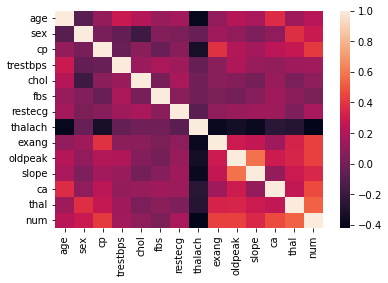

In [26]:
# Display correlation matrix and heatmap
corr = heart_data.corr()
print(corr)

sns.heatmap(corr)
plt.show()

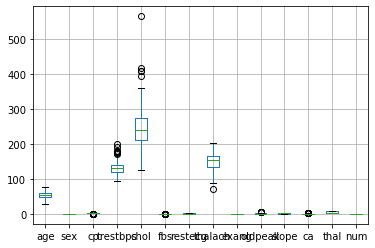

In [27]:
# Display boxplot to visualize outliers in the data

heart_data.boxplot()
plt.show()